#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


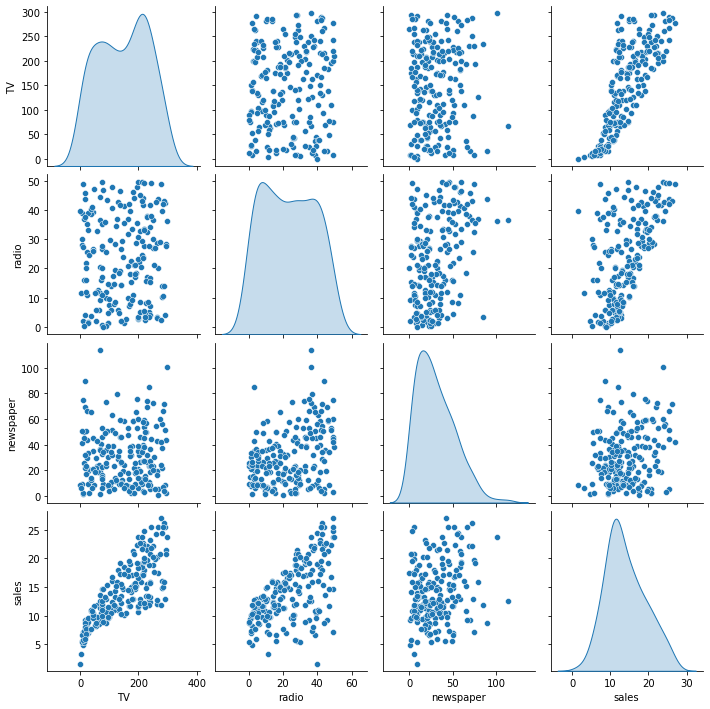

In [4]:
sns.pairplot(df,diag_kind='kde')

In [5]:
X = df.drop('sales',axis=1)

In [6]:
y = df['sales']

## Importing train_test_split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_model = LinearRegression()

In [11]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [12]:
lin_test_pred = lin_model.predict(X_test)

## Importing Performance Metrics error for Accuracy test

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
lin_MAE = mean_absolute_error(y_test, lin_test_pred)

In [15]:
lin_RMSE = np.sqrt(mean_squared_error(y_test, lin_test_pred)) #Root mean squared error

In [16]:
print("MAE by performing LinearRegression "+ str(lin_MAE))
print("RMAE by performing LinearRegression "+ str(lin_RMSE))

MAE by performing LinearRegression 1.213745773614481
RMAE by performing LinearRegression 1.516151937599388


# Polynomial Regression

### Converting X (Feature) into polynomial features 

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly_converter = PolynomialFeatures(
                                    degree=2,  # For testing purpose I've directly initialize degree equal to 2
                                    include_bias=False
                                ) 

In [19]:
poly_features = poly_converter.fit_transform(X)    

In [20]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [21]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [22]:
X.shape

(200, 3)

In [23]:
poly_features.shape

(200, 9)

In [24]:
# Becuase poly_features now include X which is converted into degree-2 polynomial i.e. [1, a, b, a^2, ab, b^2] but with 
# no bias so values are [tv, radio, newspaper, tv^2, radio^2, newspaper^2, tv*radio, tv*newspaper, radio*newspaper] 

### train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

bookmark ------ bookmark -------- bookmark ------------------------------------------------------------------------------------------------------------------------------------------->

###### Now that we have our polynomial feature set lets apply linear regression on it and compare error metrics

In [26]:
poly_converted_lin_model = LinearRegression(fit_intercept=True)

In [27]:
poly_converted_lin_model.fit(X_train, y_train)

LinearRegression()

In [28]:
poly_test_pred = poly_converted_lin_model.predict(X_test)

### Perform error metrics

In [29]:
poly_MAE = mean_absolute_error(y_test, poly_test_pred)
poly_RMSE = mean_squared_error(y_test, poly_test_pred)

### Compare error metrics of Polynomial and Linear MODEL

In [30]:
print("METRICS | LINEAR MODEL      | POLYNOMIAL MODEL")
print("-"*50)
print("MAE     | "+str(lin_MAE)+" | "+str(poly_MAE))
print("RMSE    | "+str(lin_RMSE)+" | "+str(poly_RMSE))

METRICS | LINEAR MODEL      | POLYNOMIAL MODEL
--------------------------------------------------
MAE     | 1.213745773614481 | 0.4896798044803811
RMSE    | 1.516151937599388 | 0.4417505510403745


#### ANSWER :
##### WE CAN CLEARLY SEE THAT AFTER CONVERTING FEATURES INTO POLYNOMIAL FEATURE DEGREE, OUR MODEL PERFORM BETTER

# Now the Question is,

##### How we can decide which polynomial degree (i.e. ^2, ^3, ^4,....) perform better ?

##### In general, increasing model complexity in search for better peformance leads to a Bias-Variance trade off.
##### And ofcourse increasing degree of polynomial model increases complexity.

##### We want to have a model that can generalize well to NEW UNSEEN data, but can also account for variance and patterns in the known data.
##### Extreme bias Or extreme variance both lead to bad performing model.

#### Overfit - High bias
#### Underfit - High variance

In case of polynomial regression, complexity directly relates to degree of the polynomial, but many machine learning algorithms have their own hyperparamenters that can increase complexity (Example Random forest algo which have large amount of decision trees)

# Adjusting the model parameters 
## Steps -
### 1. Loop create to store errors for various degrees  
### 2. Create different order polynomial 
### 3. Split the particular set to train and test set
### 4. Fit on training data
### 5. Store/save RMSE, MAE for both train and test set 
### 6. Plot the result and explore overfitting

In [31]:
# For testing purpose I'm only considering Root mean squared error
poly_train_RMSE = []
poly_test_RMSE = [] 

In [32]:
for deg in range(1,10):
    
    # X converted into polynomial features
    poly_converter_d = PolynomialFeatures(degree=deg,include_bias=False)
    poly_features_d = poly_converter_d.fit_transform(X)
    
    # train test split on polynomial features and label y
    X_train, X_test, y_train, y_test = train_test_split(poly_features_d, y, test_size=0.3, random_state=101)
    
    # fitting model
    adjusted_model = LinearRegression(fit_intercept=True)
    adjusted_model.fit(X_train, y_train)
    
    # predict X_train and X_test set
    # to fairly evaluate our model's performance we can consider both the train and test error 
    train_prediction = adjusted_model.predict(X_train)
    test_prediction = adjusted_model.predict(X_test)
    
    train_prediction_error = np.sqrt(mean_squared_error(y_train, train_prediction))
    test_prediction_error = np.sqrt(mean_squared_error(y_test, test_prediction))
    
    #appending into list to plot graph 
    poly_train_RMSE.append(train_prediction_error)
    poly_test_RMSE.append(test_prediction_error)

## Plotting train and test set ERROR

Lets plot upto first 5 degree's

#### Figure 1

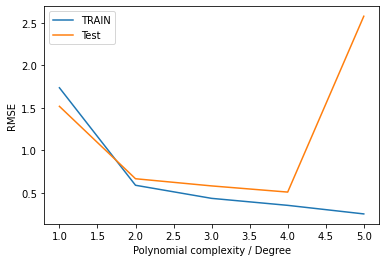

In [33]:
plt.plot(range(1,6),poly_train_RMSE[:5],label="TRAIN")
plt.plot(range(1,6),poly_test_RMSE[:5],label="Test")
plt.ylabel("RMSE")
plt.xlabel("Polynomial complexity / Degree")
plt.legend()

We can see that sudden increase on RMSE after 4th degree apply on polynomial features in Figure 1

#### Figure 2

Plotting on all degree / increasing complexity 

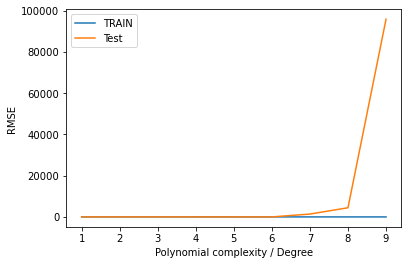

In [34]:
plt.plot(range(1,10),poly_train_RMSE,label="TRAIN")
plt.plot(range(1,10),poly_test_RMSE,label="Test")
plt.ylabel("RMSE")
plt.xlabel("Polynomial complexity / Degree")
plt.legend()

#### Figure 3

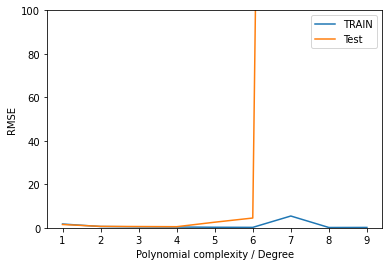

In [35]:
plt.plot(range(1,10),poly_train_RMSE,label="TRAIN")
plt.plot(range(1,10),poly_test_RMSE,label="Test")
plt.ylabel("RMSE")
plt.xlabel("Polynomial complexity / Degree")
plt.ylim(0,100)  # limiting range of 'y' to 100
plt.legend()

From Figure 3, we can see that the sudden increase in error matrics, that means giving above 4 degree will produce a bad model

###  From above figures we can conclude that Polynomial feature with degree ^3 will be a better model

# Model Deployment

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [36]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
final_model = LinearRegression()
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

#### Storing model and converter using joblib

In [37]:
from joblib import dump, load

For model

In [38]:
dump(final_model, 'sales_model.joblib')

['sales_model.joblib']

For converter

In [39]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

#### Now our model is ready to deploy and also you check whether its perform better on new/unseen data

In [40]:
new_data = [[139,21,14]]   #random data

#### Loading model and converter

In [41]:
load_poly = load('poly_converter.joblib')
load_model = load('sales_model.joblib')

In [42]:
new_data_converted = load_poly.transform(new_data)

In [43]:
new_data_converted

array([[1.390000e+02, 2.100000e+01, 1.400000e+01, 1.932100e+04,
        2.919000e+03, 1.946000e+03, 4.410000e+02, 2.940000e+02,
        1.960000e+02, 2.685619e+06, 4.057410e+05, 2.704940e+05,
        6.129900e+04, 4.086600e+04, 2.724400e+04, 9.261000e+03,
        6.174000e+03, 4.116000e+03, 2.744000e+03]])

In [44]:
load_model.predict(new_data_converted)   # loaded model

array([14.10408425])

In [45]:
final_model.predict(new_data_converted)  # original model

array([14.10408425])

# REGULARIZATION

Regularization seeks to solve a few common model issues by:

1)Minimizing model complexity

2)Penalizing the loss function 

3)Reducing model overfitting (by adding more bias to reduce model variance)

#### Types of Regularization 

1) L1 regularization - Lasso Regression : In this, Feature selection done by making some feature's coefficient exactly equal to 0

2) L2 regularization - Ridge Regression : It uses when dataset have problem of 'multi colinearity'(i.e. when independent variable are corelated with each other ) 

3) ElasticNet : It combines both L1 and L2 regularization

#### These Regularization methods do have a cost:

#### - Introduce an additional hyperparameter (alpha/beta) that needs to be tuned.

#### - A multiplier to the penalty to decide the "strength" of the penalty

### But how we actually tuned that hyperparameter(lambda/alpha) for the penalty term? So this include :

####    1. Feature Scaling :
            - Standardization
            - Normalzation
####    2. Cross Validation / Tuning hyperparameter : 
            - Hold out test set

Same code till "train_test_split" after "Converting X (Feature) into polynomial features"

In [46]:
poly_converter = PolynomialFeatures(
                                    degree=3,  # we know that degree = 3 perform well
                                    include_bias=False
                                ) 
poly_features = poly_converter.fit_transform(X)   
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Feature Scaling
Now we do not want to assume any information from the test set because that will lead to data leakage. Therefore, we only fit training data to scaling and then after we're going to transorming both the scaler version of training feature set(i.e. X_train) and normal test feature set (i.e. X_test)

process - 
1) perform train_test_split

2) fit to training feature data

3) transform training feature data

4) transform test feature data

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler() # instance of StandardScaler

In [49]:
scaler.fit(X_train) # see carefully, Only fit training dataset to scaler

StandardScaler()

scaling set = (X - mean)/deviation

In [50]:
X_train = scaler.transform(X_train) #transforming scaler version feature train set 
X_test = scaler.transform(X_test)   #transforming feature test set

--------

## L2 Regularization - Ridge Regression : Implementation

It reduces the potential for overfitting to training data by adding the penalty term to the error that is based on squared value of coefficient.

(Residual Sum of square/error/loss) + Penalty_term

In [51]:
from sklearn.linear_model import Ridge

In [52]:
ridge_model = Ridge(alpha=10)  

##### for now, I'm not considering best alpha/lambda term according to equation of penalty 
##### further we're going to perform cross vallidation for finding best alpha

In [53]:
ridge_model.fit(X_train,y_train)  # same as linear reg

Ridge(alpha=10)

In [54]:
test_pred_ridge = ridge_model.predict(X_test)   # same as linear reg

#### Error metrics RMSE, MAE on TESTING set

In [55]:
ridge_test_MAE = mean_absolute_error(y_test,test_pred_ridge)

In [56]:
ridge_test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred_ridge))

In [57]:
print("MAE by performing RidgeRegression on testing set "+ str(ridge_test_MAE))
print("RMSE by performing RidgeRegression on testing set "+ str(ridge_test_RMSE))

MAE by performing RidgeRegression on testing set 0.5774404204714183
RMSE by performing RidgeRegression on testing set 0.8946386461319685


#### Error metrics RMSE, MAE on TRAINING set

In [58]:
train_pred_ridge = ridge_model.predict(X_train)   # same as linear reg

In [59]:
ridge_train_MAE = mean_absolute_error(y_train,train_pred_ridge)

In [60]:
ridge_train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred_ridge))

In [61]:
print("MAE by performing RidgeRegression on training set "+ str(ridge_train_MAE))
print("RMSE by performing RidgeRegression on training set "+ str(ridge_train_RMSE))

MAE by performing RidgeRegression on training set 0.5288348183025332
RMSE by performing RidgeRegression on training set 0.8491805208255256


#### Now the present error metric is not to bad for model but it can be better if we provide best alpha.

#### For this we simply use CrossValidation and computer will do all this for us!! :p

In [62]:
from sklearn.linear_model import RidgeCV

In [63]:
ridgeCV_model = RidgeCV(
                        alphas=(0.1, 0.3, 0.1, 1.0, 10.0),   # Cross validating this alphas to get best of it
                        scoring='neg_mean_absolute_error'    # negative MAE In this case, higher the number better the result
                       )

In [64]:
ridgeCV_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.3,  0.1,  1. , 10. ]),
        scoring='neg_mean_absolute_error')

In [65]:
ridgeCV_model.alpha_

0.1

our model finds 1.0 alpha perform better than others

In [66]:
test_pred_ridgeCV = ridgeCV_model.predict(X_test)

#### Error metrics RMSE, MAE for ridgeCV model

In [67]:
ridgeCV_MAE = mean_absolute_error(y_test, test_pred_ridgeCV)
ridgeCV_RMSE = np.sqrt(mean_squared_error(y_test, test_pred_ridgeCV))

In [68]:
print("MAE by performing RidgeCVRegression on testing set "+ str(ridgeCV_MAE))
print("RMSE by performing RidgeCVRegression on testing set "+ str(ridgeCV_RMSE))

MAE by performing RidgeCVRegression on testing set 0.42737748843352086
RMSE by performing RidgeCVRegression on testing set 0.6180719926924644


#### We can clearly see that after cross validating the alpha value, Our model reduces error metric and increase performance

## L1 Regularization - Lasso Regression : Implementation

Difference between L2 and L1 is L2 adds penalty term to the error that is based on squared value of coefficient whether L1 adds penalty term to the error that is based on absolute value of coefficient.

#### Benefits -

1) limits the size of the coefficient

2) can yeild sparse models where some coefficients can become zero (Alternately we can say it work like feature selection)

In [69]:
from sklearn.linear_model import LassoCV   # Directly importing CV lasso reg for choosing best alpha

In [70]:
lassoCV_model = LassoCV(
                        eps=0.1,       # epsilon- it is the ratio of the alpha min to alpha max similar to linspace
                        n_alphas=100,   # Number of alphas to consider
                        cv=5            # cv specified number of folds in K-fold cross validation
                       )

In [71]:
lassoCV_model.fit(X_train, y_train)

LassoCV(cv=5, eps=0.1)

In [72]:
lassoCV_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

## See here, 
##### Above values, are the coefficient after fitting training set on lassoCV model and if you look closely then you realize that some coefficient are exactly equal to zero(0). Therefore for further calculation model neglects those feature who has coefficient equal to zero so that model become less complex and increases his performance

In [73]:
lassoCV_model.alpha_

0.4943070909225828

#### RMSE error metrics for train and test set 

In [74]:
test_pred_lassoCV = lassoCV_model.predict(X_test)
train_pred_lassoCV = lassoCV_model.predict(X_train)

In [75]:
lassoCV_RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred_lassoCV))
lassoCV_RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred_lassoCV))

In [76]:
print("RMSE by performing LassoCVRegression on testing set "+ str(lassoCV_RMSE_test))
print("RMSE by performing LassoCVRegression on training set "+ str(lassoCV_RMSE_train))

RMSE by performing LassoCVRegression on testing set 1.130800102276253
RMSE by performing LassoCVRegression on training set 1.0946800156661722


#### Now if we compare both L1 and L2 then we can see that L2 perform better than L1

## Elastic Net Regularization - L1&L2 : Implementation

It combines penalties of both L1 and L2 to RSS/error/loss

In [77]:
from sklearn.linear_model import ElasticNetCV

In [78]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [79]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [80]:
elastic_model.l1_ratio_

1.0

In [81]:
test_pred_elastic = elastic_model.predict(X_test)
train_pred_elastic = elastic_model.predict(X_train)

#RMSE
elastic_RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred_elastic))
elastic_RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred_elastic))

#MAE
elastic_MAE_test = mean_absolute_error(y_test, test_pred_elastic)
elastic_MAE_train = mean_absolute_error(y_train, train_pred_elastic)

### Training set Error metric

In [82]:
print("MAE by performing elastic net on training set "+ str(elastic_MAE_train))
print("RMSE by performing elastic net on training set "+ str(elastic_RMSE_train))

MAE by performing elastic net on training set 0.4307582990472369
RMSE by performing elastic net on training set 0.6441168601816857


In [83]:
print("MAE by performing elastic net on testing set "+ str(elastic_MAE_test))
print("RMSE by performing elastic net on testing set "+ str(elastic_RMSE_test))

MAE by performing elastic net on testing set 0.5663262117569448
RMSE by performing elastic net on testing set 0.7485546215633724


### Final Root Mean Squared Error Comparison on TESTING dataset

In [84]:
print("| Errors  |  Ridge             |  Lasso             |  ElasticNet        |")
print("-"*74)
print("| RMSE    | "+str(ridgeCV_RMSE)+" | "+str(lassoCV_RMSE_test)+" | "+str(elastic_RMSE_test)+" |")

| Errors  |  Ridge             |  Lasso             |  ElasticNet        |
--------------------------------------------------------------------------
| RMSE    | 0.6180719926924644 | 1.130800102276253 | 0.7485546215633724 |


### At last we can conclude that Ridge Regression i.e. L2 Regularization perform better

# Thank You!!!